#### Pip Installments

In [1]:
pip install python-igraph


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [26]:
pip install -i https://test.pypi.org/simple/ hetpy==0.2.1a

Looking in indexes: https://test.pypi.org/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for hetpy: filename=hetpy-0.2.1a0-py3-none-any.whl size=13981 sha256=be25ee464bec1ae1d6167b909a13f7aa276b45ebf4a7bf1a09886441e86c4cae
  Stored in directory: /Users/I542771/Library/Caches/pip/wheels/1b/7e/99/25aa3c225eec30b375d10ebfbf94f738be5ca8e870718a648c
Successfully built hetpy
  Attempting uninstall: hetpy
    Found existing installation: hetpy 0.2.1
    Uninstalling hetpy-0.2.1:
      Successfully uninstalled hetpy-0.2.1

[notice] A new release of pip available: 22.2.2 -> 23.0
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pycairo


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install cairocffi


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### Basic Graph Creation

In [1]:
from hetpy import HetGraph, Node, Edge, HetPaths, MetaPath
from hetpy.graphUtils import create_meta_projection
import matplotlib.pyplot as plt
import igraph as ig
import pandas as pd
from copy import deepcopy
import itertools

#### Create a simple graph with two node types and one edge type

HetPy functions as a standard graph library which uses strongly typed node and edge objects. To create a basic, simple graph, we first create a standard set of two nodes and a single edge that connects those nodes.

In [2]:
node = Node("MockType",{"Name": "node1"})
node_two = Node("MockType2",{"Name": "node2"})

edge = Edge(node, node_two, True, "EdgeType")

We can then easily create a heterogeneous graph $G=(V,E)$ defined by set of nodes $V$ and a set of edges $E$ 

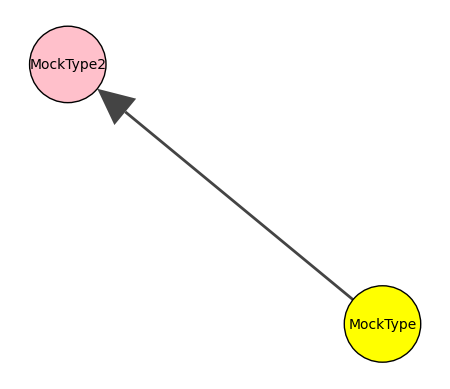

In [4]:
graph = HetGraph([node, node_two], [edge])
color_map = {
    "MockType": "yellow",
    "MockType2": "pink"
}
visual_style = {
    "vertex_label": [node.type for node in [node, node_two]],
    "vertex_label_size": 10
}
fig, ax = plt.subplots()
graph.plot(type_color_map=color_map, axis=ax, plot_args=visual_style)

While this graph is quite simple, we can also define edge types by specifying the node types they connect and add a list of these paths to the graph. These semantic paths then enable us to infer edge types while creating the graph. Furthermore, we can add attribtues to the nodes that are handeled just like normal attributes.

In [10]:
# define paths
edge_type_mappings = [(("Player","Club"),"played_for"), (("Club", "Shirt"),"wears")]
paths = HetPaths(edge_type_mappings)

In [11]:
# define nodes and edges
players = [Node("Player", {"Name": "Lionel Messi"}), Node("Player", {"Name": "Toni Kroos"}), Node("Player", {"Name": "Luis Figo"})]
clubs = [Node("Club", {"Name": "Real Madrid"}), Node("Club", {"Name": "FC Barcelona"})]
shirts = [Node("Shirt", {"shirt_color": "White"}), Node("Shirt", {"shirt_color": "Blue and Red"})]

nodes = list(itertools.chain(players, clubs, shirts))
edges = [
    Edge(players[0], clubs[1], False),
    Edge(players[1], clubs[0], False),
    Edge(players[2], clubs[1], False),
    Edge(players[2], clubs[0], False),
    Edge(clubs[0], shirts[0], False),
    Edge(clubs[1], shirts[1], False)
]



Then we can create a HetGraph out of the defined objects. You will notice that during creation, the graph constructor will report that some edges have a undefined type and that the type will be infered from the paths assigned to it. After creation, we can check if all edge types are correctly inferred.

In [12]:
het_graph = HetGraph(nodes, edges, paths)

Some edge types are undefined. Infering types from paths...


The HetGraph class asserts also automaticall asserts the defined edge types. If they do not match the specified paths, an error is raised during the object creation.

In [13]:
# assign wrong type to edge
wrong_edges = deepcopy(edges)
wrong_edges[0].type = "wears"

HetGraph(nodes, wrong_edges, paths)

TypeException: A type error occured: Some defined edge types do not match the defined paths: wears | played_for! Abborting graph creation.

We can then again use the plotting approach to visualize our HetGraph.

{'nodes': (<hetpy.models.node.Node object at 0x103725840>, <hetpy.models.node.Node object at 0x13d588550>), 'directed': False, 'type': 'played_for', 'attributes': {}}
{'nodes': (<hetpy.models.node.Node object at 0x13d58b430>, <hetpy.models.node.Node object at 0x13d80e590>), 'directed': False, 'type': 'played_for', 'attributes': {}}
{'nodes': (<hetpy.models.node.Node object at 0x13d58be20>, <hetpy.models.node.Node object at 0x13d588550>), 'directed': False, 'type': 'played_for', 'attributes': {}}
{'nodes': (<hetpy.models.node.Node object at 0x13d58be20>, <hetpy.models.node.Node object at 0x13d80e590>), 'directed': False, 'type': 'played_for', 'attributes': {}}
{'nodes': (<hetpy.models.node.Node object at 0x13d80e590>, <hetpy.models.node.Node object at 0x13d58b520>), 'directed': False, 'type': 'wears', 'attributes': {}}
{'nodes': (<hetpy.models.node.Node object at 0x13d588550>, <hetpy.models.node.Node object at 0x13d58b6d0>), 'directed': False, 'type': 'wears', 'attributes': {}}


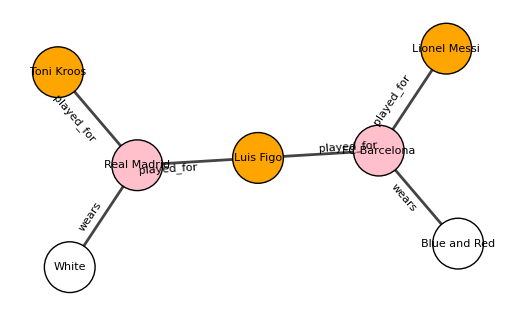

In [14]:
nodes = het_graph.nodes
vertex_labels = [node.attributes["Name"] for node in nodes[:-2]]
vertex_labels = vertex_labels + [node.attributes["shirt_color"] for node in nodes[-2:]]
color_map = {
    "Player": "orange",
    "Club": "pink",
    "Shirt": "white"
}
for edge in het_graph.edges:
    print(vars(edge))
visual_style = {
    "vertex_label": vertex_labels,
    "vertex_size": 0.3,
    "vertex_label_size": 8,
    "edge_label": [edge.type for edge in het_graph.edges],
    "edge_label_size": 8,
    "edge_align_label": True
}
layout = het_graph.graph.layout_kamada_kawai()
fig, ax = plt.subplots()
het_graph.plot(type_color_map=color_map, axis=ax, plot_args=visual_style, layout=layout)

#### Meta Paths

In order to define rich semantics of the graphs domain on the object itself, the graph constructor also considers list of meta path objects and applies it on the graph. The MetaPath object takes a list of edge types, a description and a required abbreviation. The abbreviation functions as the unique identifier of the meta path. Here, we can reuse edge types defined on the path dictionary used before.

In [10]:
edge_type_mappings = [(("Player","Club"),"played_for"), (("Club", "Shirt"),"wears")]
paths = HetPaths(edge_type_mappings)

print(paths)

hasPlayedInMetaPath = MetaPath(path=["played_for","wears"], description="The player has played in a certain shirt color", abbreviation="hasPlayedIn")

{('Player', 'Club'): 'played_for', ('Club', 'Shirt'): 'wears'}


In [11]:
# define nodes and edges
players = [Node("Player", {"Name": "Lionel Messi"}), Node("Player", {"Name": "Toni Kroos"}), Node("Player", {"Name": "Luis Figo"})]
clubs = [Node("Club", {"Name": "Real Madrid"}), Node("Club", {"Name": "FC Barcelona"})]
shirts = [Node("Shirt", {"shirt_color": "White"}), Node("Shirt", {"shirt_color": "Blue and Red"})]

nodes = list(itertools.chain(players, clubs, shirts))
edges = [
    Edge(players[0], clubs[1], False),
    Edge(players[1], clubs[0], False),
    Edge(players[2], clubs[1], False),
    Edge(players[2], clubs[0], False),
    Edge(clubs[0], shirts[0], False),
    Edge(clubs[1], shirts[1], False)
]

In [12]:
hetGraphWithMetaPaths = HetGraph(nodes, edges, path_list=paths, meta_paths=[hasPlayedInMetaPath])

Some edge types are undefined. Infering types from paths...


We can check whether the meta path was defined correctly on the graph.

In [13]:
hetGraphWithMetaPaths.get_meta_paths()

{'hasPlayedIn': ['played_for', 'wears']}

Also, we can add a meta path in hindsight.

In [14]:
reverseMetaPath = MetaPath([paths[('Club','Shirt')], paths[('Player','Club')]], "The shirt color was worn by the player", "wasWornBy")
hetGraphWithMetaPaths.add_meta_path(reverseMetaPath)

In [15]:
hetGraphWithMetaPaths.get_meta_paths()

{'hasPlayedIn': ['played_for', 'wears'], 'wasWornBy': ['wears', 'played_for']}

#### Create a graph from a .csv file

HetPy provides a utility function to create a heterogeneous graph from a .csv file. For pracitcality reasons, we assume each row of the .csv file to be a node and create edges by specifying the row indices to which a node connects in a special column. 

In [15]:
from hetpy import fromCSV

Consider the following column structure in our demo .csv file:

In [16]:
data = pd.read_csv('./playClubData.csv', index_col="index")
data

,type,name,links_to
index,,,
0,Player,Lionel Messi,[4]
1,Player,Luis Figo,"[3, 4]"
2,Player,Sergio Ramos,[3]
3,Club,Real Madrid,[5]
4,Club,FC Barcelona,[6]
5,Stadium,Bernabeu,[3]
6,Stadium,Camp Nou,[4]


We specify the type column and the foreign key column as function parameters and can then easily load the data into a csv file:

In [17]:
column_attribute_map = {'Name': 'name'}
mock_graph = fromCSV('./playClubData.csv','type','links_to',consider_edge_directions=False, node_attribute_column_map=column_attribute_map)

mock_graph.node_types

{'Club', 'Player', 'Stadium'}

The function also allows to pass arguments directly to the graphs initialization function as a dictionary. This way, we can also sepcify a network schema and a list of meta paths for the graph we want to create from a csv file.

In [18]:
edge_type_mappings = [(("Player","Club"),"played_for"), (("Club", "Stadium"),"plays_in"), (('Stadium', 'Club'),"is_owned_by")]
paths = HetPaths(edge_type_mappings)

has_played_in_meta_path = MetaPath(path=["played_for","plays_in"], description="The player has played in a certain shirt color", abbreviation="hasPlayedIn")

graph_args = {
    'path_list': paths,
    'meta_paths': [has_played_in_meta_path]
}

loaded_graph = fromCSV('./playClubData.csv','type','links_to',consider_edge_directions=True, node_attribute_column_map=column_attribute_map, graphArgs=graph_args)

loaded_graph.paths

Some edge types are undefined. Infering types from paths...


{('Player', 'Club'): 'played_for',
 ('Club', 'Stadium'): 'plays_in',
 ('Stadium', 'Club'): 'is_owned_by'}

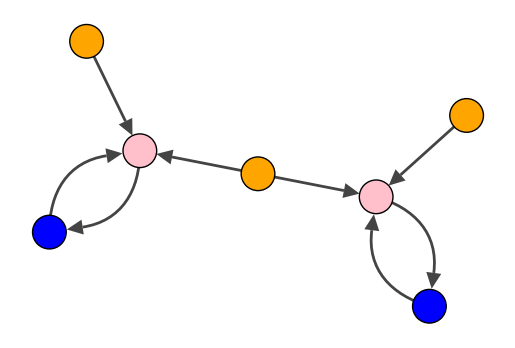

In [23]:
type_color_map = {
    "Player": "orange",
    "Club": "pink",
    "Stadium": "blue"
}

layout = loaded_graph.graph.layout_kamada_kawai()

fig, ax = plt.subplots()

loaded_graph.plot(type_color_map=type_color_map, axis=ax, layout=layout)


#### Meta Projections

To compress the information a heterogeneous graph contains and focus on a particular node type relation, it is possible to create a projection of the graph on basis of a meta path. Following along the concept of bipartite projections in a bipartite graph, this is called a "meta projection".

A meta projection connects to two nodes if there exists a path that is an instance of the meta path that the projection is based on. Consequently, the meta projection show the relation between the node types of the source and the sink of the meta path. Consequently, if the source and the sink ahve the same type, the resulting projection graph only contains one node type. If the source and sink have different types, the resulting projection is a bipartite graph.

Take for example the following code to create a meta projection based on the already defined meta path "hasPlayedIn". It shows which player has already played in which shirt color.

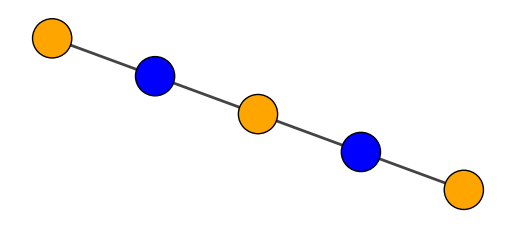

In [24]:
projection = create_meta_projection(loaded_graph, has_played_in_meta_path)

fig, ax = plt.subplots()
layout = projection.graph.layout_kamada_kawai()
projection.plot(type_color_map, axis=ax, layout=layout)

Projections can also be directed if specified.

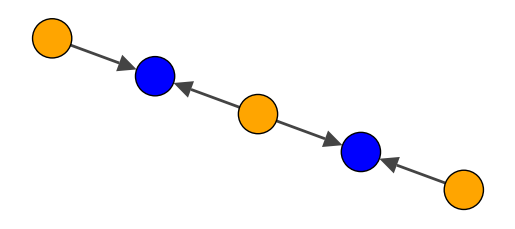

In [25]:
directed_projection = create_meta_projection(loaded_graph, has_played_in_meta_path, directed=True)

fig, ax = plt.subplots()
layout = directed_projection.graph.layout_kamada_kawai()
directed_projection.plot(type_color_map, axis=ax, layout=layout)